00:38:21 - cmdstanpy - INFO - Chain [1] start processing
00:38:22 - cmdstanpy - INFO - Chain [1] done processing


----- Prophet 模型评估（测试集部分） -----
R²: -0.5958
RMSE: 20063.05
MAE: 10721.82
Accuracy: 0.8724


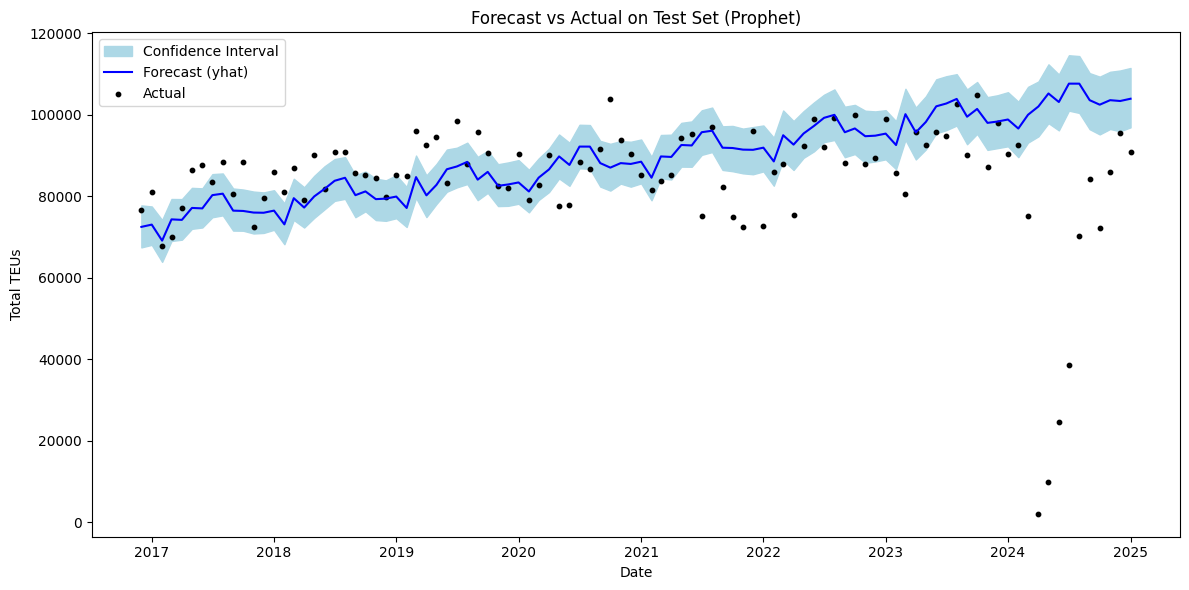

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. 读取并准备数据
df = pd.read_csv("Baltimore.csv")
df['ds'] = pd.to_datetime(df['Month'], format='%b-%y')
df = df[['ds', 'Total TEUs']].rename(columns={'Total TEUs': 'y'})
df = df.sort_values('ds').reset_index(drop=True)

# 2. 划分训练集和测试集（按时间顺序）
train_ratio = 0.7
split_index = int(len(df) * train_ratio)
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

# 3. Prophet 模型拟合（仅使用训练集）
model = Prophet()
model.fit(train_df)

# 4. 构造测试集对应的 future 时间点进行预测
future = pd.DataFrame({'ds': test_df['ds']})
forecast = model.predict(future)

# 5. 合并预测值与真实 test 数据
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
test_eval = test_df.merge(forecast, on='ds')

# 6. 模型评估
rmse = np.sqrt(mean_squared_error(test_eval['y'], test_eval['yhat']))
mae = mean_absolute_error(test_eval['y'], test_eval['yhat'])
r2 = r2_score(test_eval['y'], test_eval['yhat'])

# 7. 打印结果
print("----- Prophet 模型评估（测试集部分） -----")
print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

# 8. 可视化（测试集预测）
plt.figure(figsize=(12, 6))
plt.fill_between(test_eval['ds'], test_eval['yhat_lower'], test_eval['yhat_upper'], color='lightblue', label='Confidence Interval')
plt.plot(test_eval['ds'], test_eval['yhat'], color='blue', label='Forecast (yhat)')
plt.scatter(test_eval['ds'], test_eval['y'], color='black', s=10, label='Actual')
plt.title("Forecast vs Actual on Test Set (Prophet)")
plt.xlabel("Date")
plt.ylabel("Total TEUs")
plt.legend()
plt.tight_layout()
plt.show()
